## Tarea 3 
### Autor: Javier Abarca Jimenez 
### Carné: B70018
### Dataset: [Enlace](https://www.kaggle.com/lodetomasi1995/income-classification) 

#Problema
¿Cuál es la agrupación de datos resultante según el sueldo anual de personas dado un dataset que contenga información de dichas personas con distintas características (edad, ocupación, etc) ? Para este problema se busca visualizar los datos según la cantidad de ingresos que recibe cada persona perteneciente a la muestra de datos elegida. 

El conjunto de datos contiene información (edad, ocupación, entre otros) sobre ingresos y educación de más de 32.000 personas de diferentes países como Estados Unidos y Cuba. El dato de los ingresos existe dentro del dataset (mayores o menos a 50.000 dólares anuales), pero se va a remover este atributo para realizar clustering y obtener los resultados esperados.

In [112]:
import os 
import pandas as pd
from pandas import DataFrame
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
import random
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder

In [113]:
#Se sube el set de datos (enlace se encuentra al inicio del proyecto) a un repositorio personal y se cargan el conjunto a utilizar
data = pd.read_csv('https://raw.githubusercontent.com/Jaleab/agvd-21b-javier-abarca/main/tareas/tarea_3/income_evaluation.csv', sep=',')

Visualizacion de los datos sin procesar:

In [114]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Limpieza del dataset

In [115]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [116]:
data.shape

(32561, 15)

###Revision de nulos

In [117]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Debido a que muchos atributos del dataset se encuentran en forma de categorias, a continuacion se realiza la conversion de estos campos a datos numericos. Posteriormente, se muestra el dataset despues de la limpieza.


In [118]:
le = LabelEncoder()
data['income'] = le.fit_transform(data.income)
data['native-country'] = le.fit_transform(data['native-country'])
data['sex'] = le.fit_transform(data.sex)
data['race'] = le.fit_transform(data.race)
data['relationship'] = le.fit_transform(data.relationship)
data['occupation'] = le.fit_transform(data.occupation)
data['marital-status'] = le.fit_transform(data['marital-status'])
data['education'] = le.fit_transform(data.education)
data['workclass'] = le.fit_transform(data.workclass)


data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


Se elimina las columna fnlwgt

In [119]:
#y = data.occupation
y = data.income
#x = data.drop(['income','fnlwgt'], axis=1)
x = data.drop(['fnlwgt'], axis=1)
print(x.shape)
x.head()

(32561, 14)


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,9,13,2,10,5,2,0,0,0,40,5,0


# Principal component analysis (PCA): Reducción de dimensionalidad lineal

1. Estandarizacion de las características 

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data=scaler.transform(x)


2. Todos los componentes se guardan y se retiene el 95% de la varianza.

In [121]:
from sklearn.decomposition import PCA
#Se crea una instancia del modelo
pca=PCA(.95)
principalComponents = pca.fit(scaled_data)
#Se aplica el mapeo (transform)
pca_x = pca.transform(scaled_data)

In [122]:
print(x.shape)
x = pca_x
print(x.shape)

(32561, 14)
(32561, 13)


# Density-based spatial clustering of applications with noise (DBSCAN)


In [123]:
def show_clusters(x, clusters):
    df = DataFrame(dict(x=x[:,0], y=x[:,1], label =clusters))
    cmap = plt.get_cmap('gnuplot')
    colors = {-1: 'red', 0:'blue', 1:'orange', 2:'green', 3:'skyblue',4: 'cyan', 5:'magenta', 6:'yellow', 7:'black'}
    #colors = [cmap(i) for i in np.linspace(0, 1, 5)]
    
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x',y='y', label=key, color=colors[key%8])

    plt.show()
    

#Hiperparametros.

1. Eps = 0.5

  Esto especifica qué tan cerca deben estar los puntos entre sí para ser considerados parte de un clúster. Significa que si la distancia entre dos puntos es menor o igual al eps, estos puntos se consideran vecinos.

2. min_samples = 150 

  Cuanto mayor sea el valor de min_samples que se proporcione, más conservadora será la agrupación: se declararán más puntos como ruido y las agrupaciones se restringirán a áreas progresivamente más densas.

###Resultado del uso de estos parametros:    

  Se muestra una cantidad muy reducida de clusters debido a que min_samples es un probablemente un valor muy grande, al menos en combinacion con el eps definido.

Estimated number of clusters: 1
Estimated number of noise points: 31837
Silhouette Coefficient: -0.218


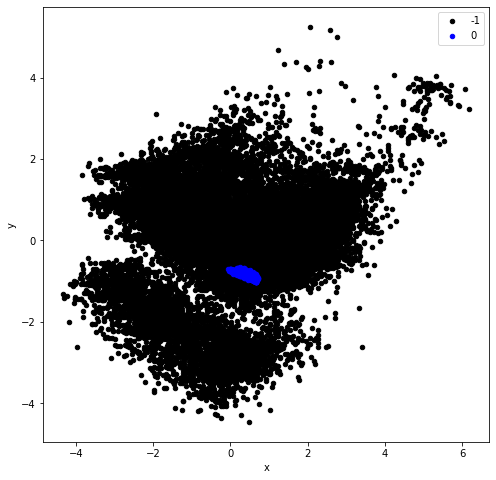

In [124]:

db = DBSCAN(eps=.5, min_samples=150).fit(x)
clusters_n = db.labels_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))


show_clusters(x, clusters_n)

#Hiperparametros.

1. Eps = 0.5

2. min_samples = 50


###Resultado del uso de estos parametros:    

  Se intenta reducir el valor de min_samples para evitar el problema anterior de que se obtienen muy pocos clusters. Asismismo, con lo que respecta al analisis de valor de eps, se puede observar que hay muchos puntos negros que simboliza que hay mucho ruido, esto quiere decir que los datos estan relativamente separados (al menos para el valor asignado de eps).


Estimated number of clusters: 18
Estimated number of noise points: 28642
Silhouette Coefficient: -0.326


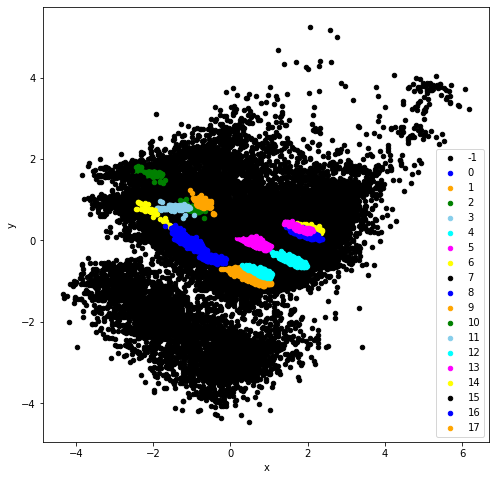

In [125]:
db = DBSCAN(eps=.5, min_samples=50).fit(x)
clusters_n = db.labels_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))
show_clusters(x, clusters_n)

#Hiperparametros.

1. Eps = 1

2. min_samples = 50


###Resultado del uso de estos parametros:    

  Se mantiene el valor de min_samples de la iteracion pasada para analizar el resultado de la combinacion de este valor con un eps mas grande. Se puede notar que aunque se redujo la cantidad de puntos negros no se mejora la metrica del coeficiente de silhoutte. Cabe destacar que este indica cuán similar es un objeto a su propio grupo (cohesión) en comparación con otros grupos (separación).


Estimated number of clusters: 20
Estimated number of noise points: 17832
Silhouette Coefficient: -0.190


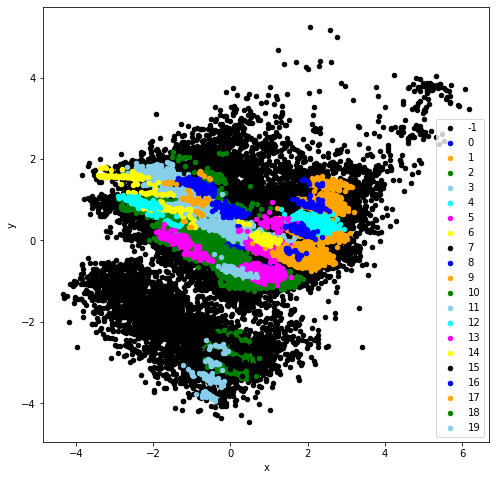

In [126]:
db = DBSCAN(eps=1, min_samples=50).fit(x)
clusters_n = db.labels_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))
show_clusters(x, clusters_n)

#Hiperparametros.

1. Eps = 1

2. min_samples = 100


###Resultado del uso de estos parametros:    

  Debido a la insatisfaccion de los resultados anteriores se decide mantener el valor del eps pero volver a aumentar el valor de min_samples (como en la primera iteracion), se observa que el coeficiente de Silhoutte mejora. Sin embargo, no se considera del todo exitoso debido a que la cantidad de ruido aun parece ser muy alta.


Estimated number of clusters: 13
Estimated number of noise points: 21047
Silhouette Coefficient: -0.189


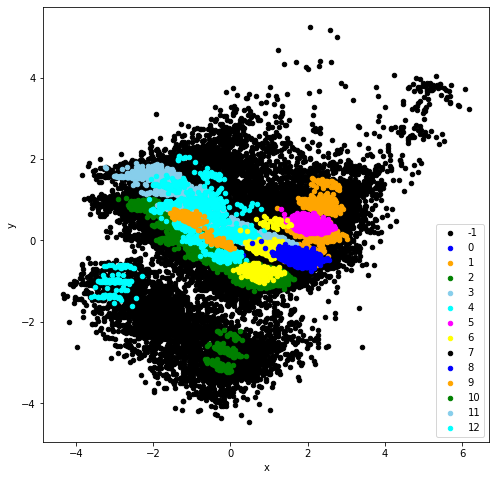

In [127]:
db = DBSCAN(eps=1, min_samples=100).fit(x)
clusters_n = db.labels_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))
show_clusters(x, clusters_n)

#Hiperparametros.

1. Eps = 1.5

2. min_samples = 100


###Resultado del uso de estos parametros:    

  Para deshacerse aun mas del ruido se aumenta el eps a 1.5 y se mantiene el min_samples. Se considera que esta combinacion de parametros son una mejora debido al resultado del coeficiente de silhouette (mejora aun mas).


Estimated number of clusters: 5
Estimated number of noise points: 11120
Silhouette Coefficient: 0.011


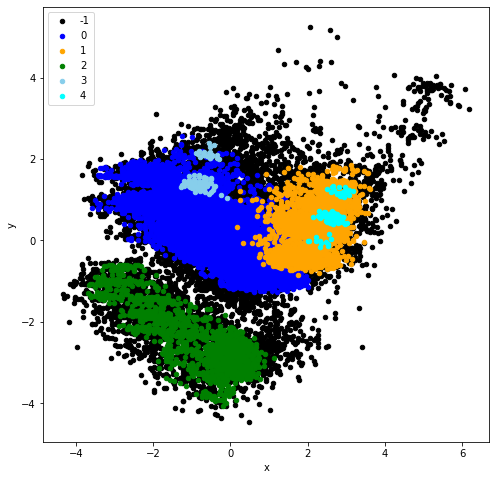

In [128]:
db = DBSCAN(eps=1.5, min_samples=100).fit(x)
clusters_n = db.labels_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))
show_clusters(x, clusters_n)

Podemos notar que ahora existen menos clusters y mejor demarcados según el gráfico. También podemos ver que el coeficiente de silhouette mejoró ligeramente. 

## Distancia máxima de 1.5

* Se seleccionó un eps de 1.5, lo que significa que tendría una distancia máxima de 1.5 entre muestras. Esto determinará que pertenece y que no al vecindario o cluster.

## Muestras mínimas de 150

* Determinamos un min_samples de 150 para que el punto no sea considerado ruido. 


Estimated number of clusters: 5
Estimated number of noise points: 12967
Silhouette Coefficient: -0.002


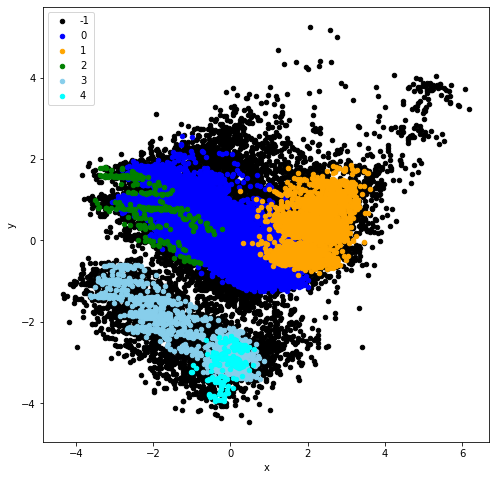

In [129]:
db = DBSCAN(eps=1.5, min_samples=150).fit(x)
clusters_n = db.labels_
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(x, labels))
show_clusters(x, clusters_n)

### Tabla con resultados

| Resultado | Eps | Min_samples | # Clusters | # Noise points | Silhouette Coefficient |
|-----------|-----|-------------|------------|----------------|------------------------|
| C         | 0.5 |         150 |          1 |          31400 |                 -0.207 |
| B         | 0.5 |          50 |         17 |          27473 |                 -0.292 |
| D         |   1 |          50 |         20 |          16033 |                 -0.232 |
| E         |   1 |         100 |         13 |          21047 |                 -0.189 |
| F         | 1.5 |         100 |          5 |           9526 |                 0.054 |
| G         | 1.5 |         150 |          4 |          11323 |                 0.009 |

El resultado H fue el que obtuvo un mejor valor Silhouette, pero todos estos valores no fueron buenos. Una mayor cantidad de muestras podría ayudar a obtener mejores resultados.